#  Boston Flat Price Prediction

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [1]:
# Importing necessary libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading Boston1.csv dataset
data = pd.read_csv("Boston1.csv")
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [2]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


## EDA (Exploratory data analysis)

In [3]:
# Shape of Dataset
data.shape

(506, 14)

In [4]:
# The info() method provides a summary of the DataFrame, including the
# data types of each column, the number of non-null values, and memory usage.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


There is no null value and all dtype is numeric

In [5]:
# Checking for duplicate records

data.duplicated().sum()

0

In [6]:
# Generating descriptive statistics for numeric columns using describe()

data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<Axes: >

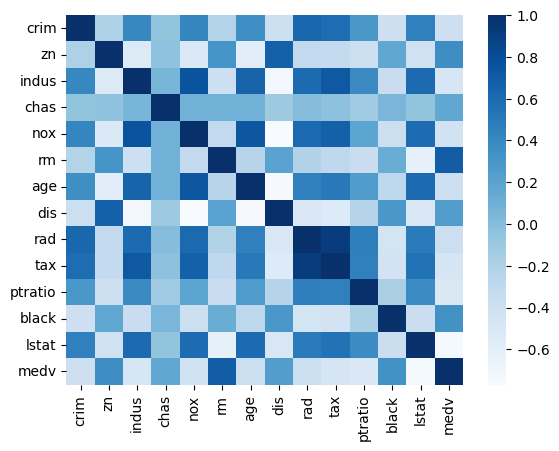

In [7]:
# Checking correlation between each individual features

sns.heatmap(data.corr(), cmap = 'Blues')

In [8]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
# checking correlation of target feature with all other features

data.corr().medv

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

## Data Visualization

### **Let's check the distribution and outliers for each column in the data**

zn
Skew : 2.23


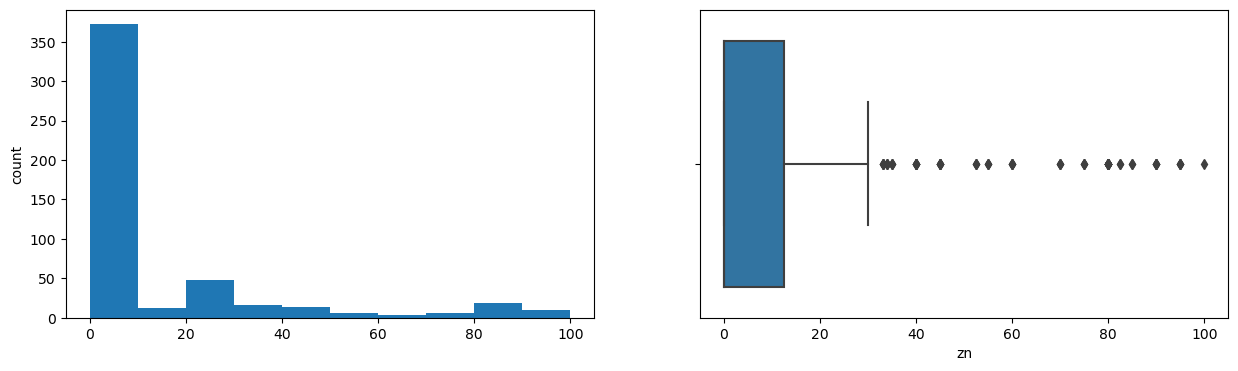

indus
Skew : 0.3


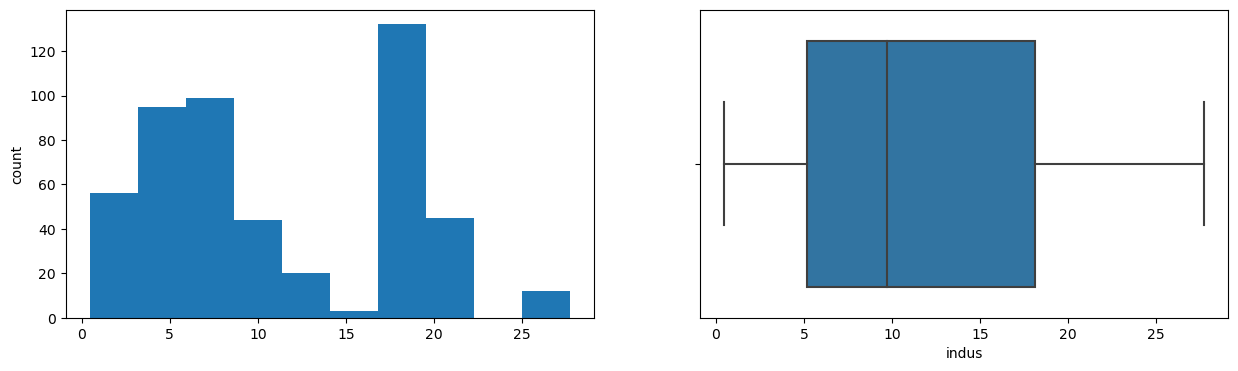

chas
Skew : 3.41


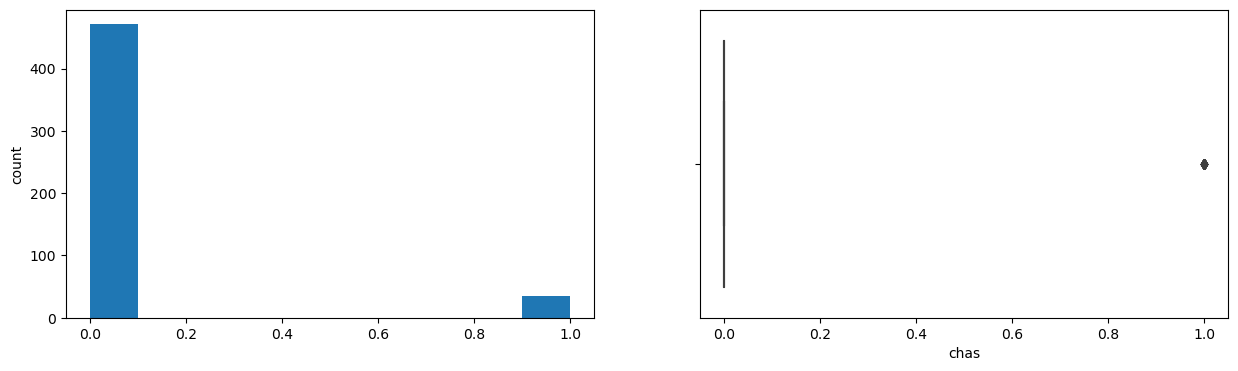

nox
Skew : 0.73


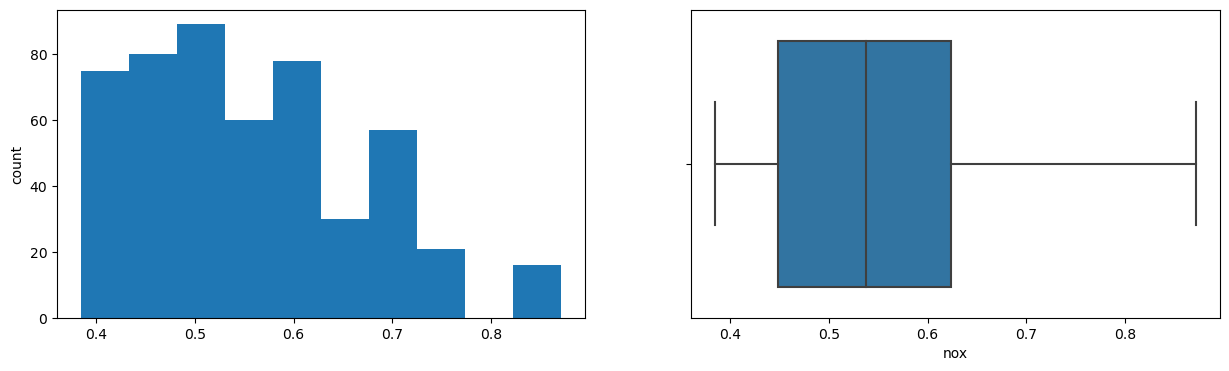

rm
Skew : 0.4


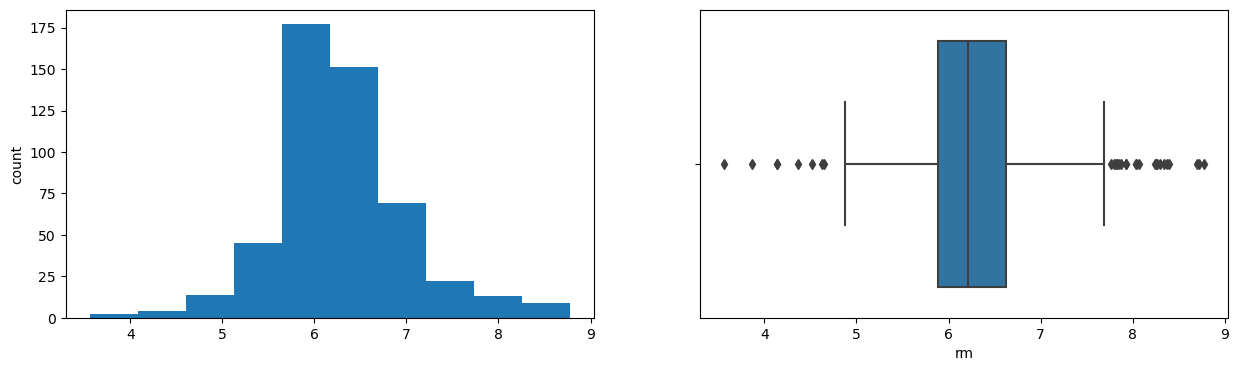

age
Skew : -0.6


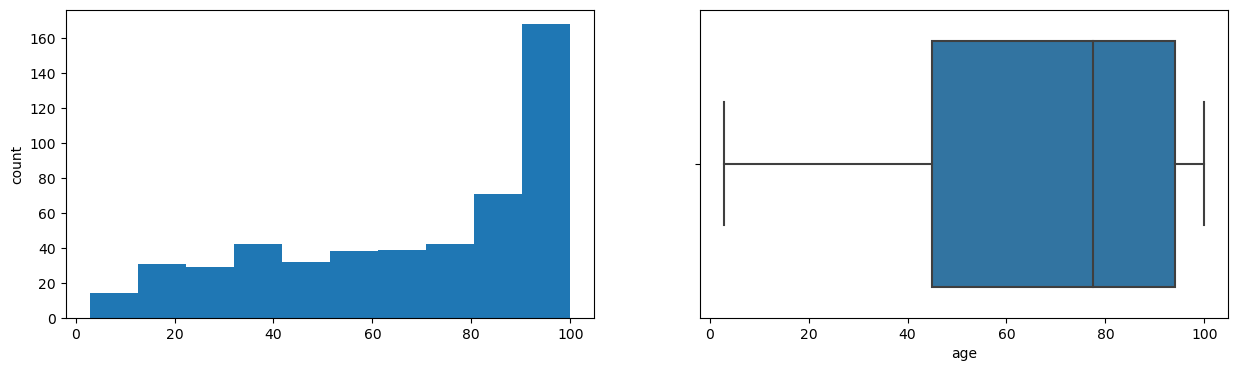

dis
Skew : 1.01


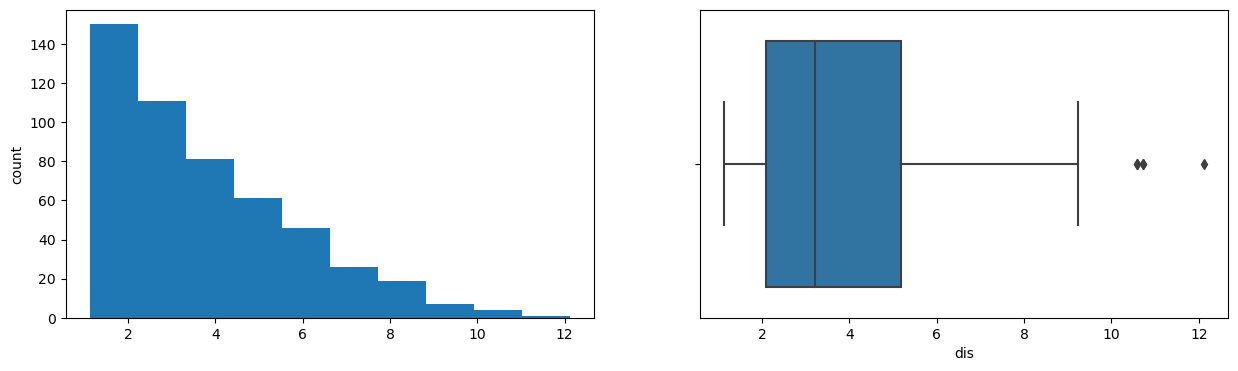

rad
Skew : 1.0


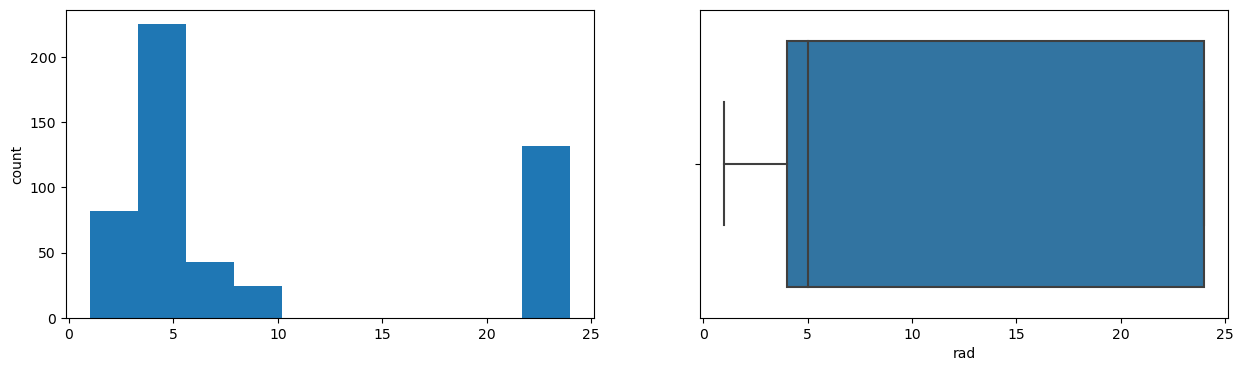

tax
Skew : 0.67


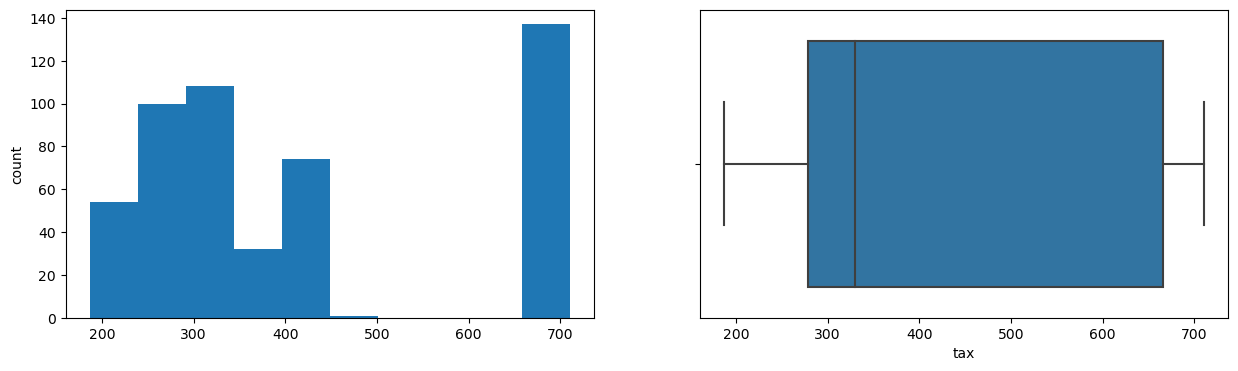

ptratio
Skew : -0.8


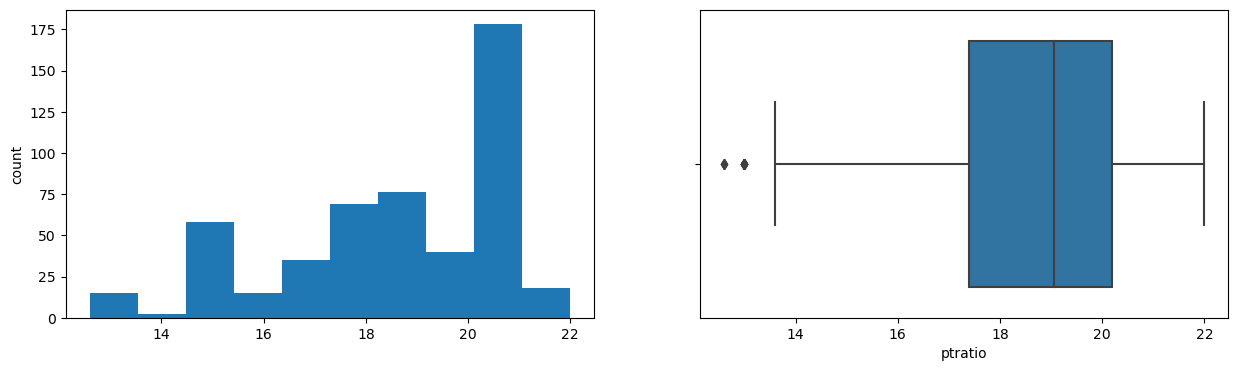

black
Skew : -2.89


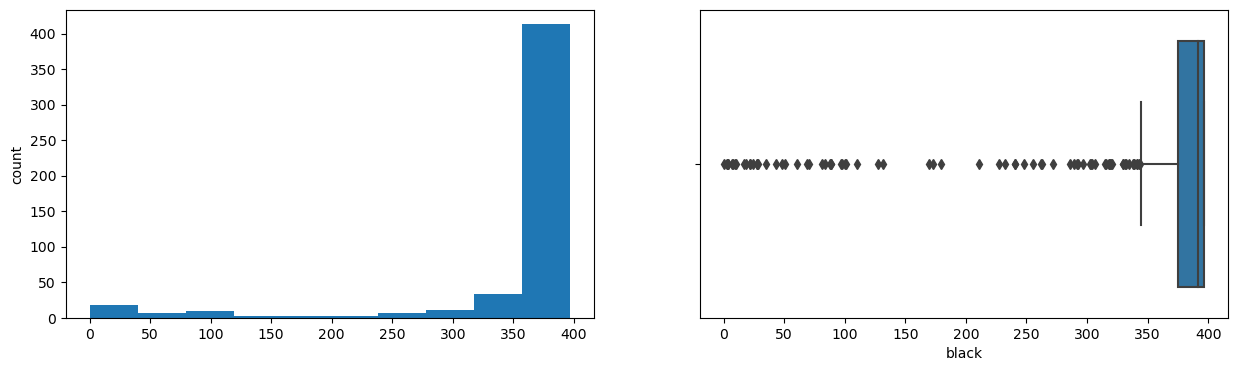

lstat
Skew : 0.91


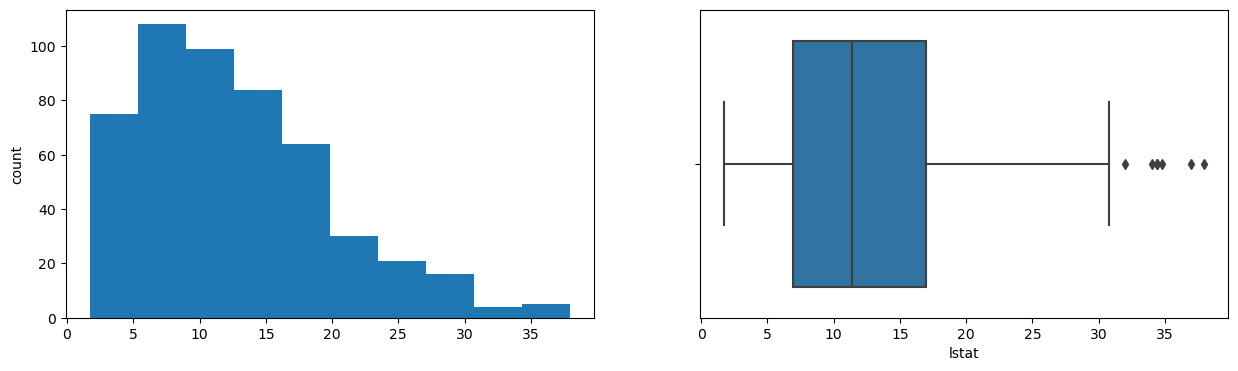

medv
Skew : 1.11


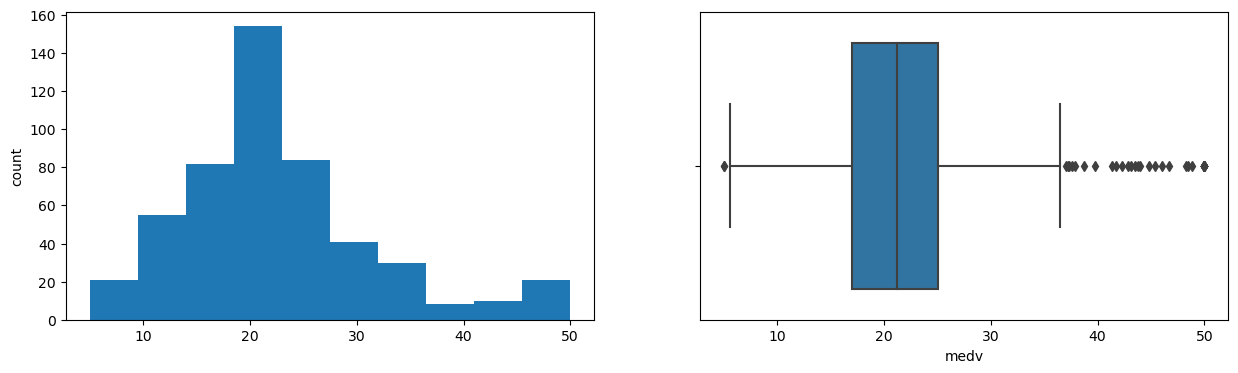

In [10]:
for col in data.columns[1:]:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

Columns like crim, zn, rm, black, lstat, medv have outliers.

Let's remove medv outliers (medv = 50)

In [11]:
data = data[~(data['medv'] >= 50.0)]
print(np.shape(data))

(490, 14)


# Preparing data

In [12]:
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [13]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [14]:
print(X.shape)
print(y.shape)

(490, 13)
(490, 1)


In [15]:
print(X.size)
print(y.size)

6370
490


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 28)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(343, 13)
(343, 1)
(147, 13)
(147, 1)


# Model Building

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print(regressor.coef_)

[[-1.44996236e-01  2.48931409e-02 -5.38419140e-02  1.21609280e+00
  -9.80990980e+00  4.03148953e+00 -4.03865538e-02 -1.00405708e+00
   2.40318227e-01 -1.15314744e-02 -7.84141290e-01  6.04656835e-03
  -3.16363880e-01]]


In [20]:
print(regressor.intercept_)

[28.20115556]


In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([[10.77280308],
       [18.6432224 ],
       [33.74970947],
       [26.18203598],
       [19.56158218],
       [ 9.53402166],
       [22.18851641],
       [20.54017311],
       [21.76651095],
       [13.05012254],
       [ 6.28722967],
       [16.727078  ],
       [29.17780504],
       [23.04669968],
       [11.47822905],
       [13.75989918],
       [16.02249883],
       [14.67685327],
       [23.18274272],
       [18.97045456],
       [10.84973378],
       [16.03921493],
       [13.56494407],
       [18.59894946],
       [27.58173178],
       [17.7306747 ],
       [23.2613712 ],
       [23.22205562],
       [23.72158017],
       [19.23385394],
       [14.95186844],
       [13.80363418],
       [25.90126517],
       [25.7252265 ],
       [21.77063197],
       [31.0272004 ],
       [23.64014835],
       [19.54484311],
       [32.49002386],
       [23.22074254],
       [24.34661562],
       [29.7759441 ],
       [12.82748704],
       [31.71188476],
       [25.81474492],
       [26

In [22]:
y_pred = pd.DataFrame(y_pred,columns=["predicted"])
y_pred.head()

,predicted
0,10.772803
1,18.643222
2,33.749709
3,26.182036
4,19.561582


In [23]:
df_pred = pd.DataFrame(columns=['Actual','Pred'])
df_pred['Actual'] = y_test.reset_index()['medv']
df_pred['Pred'] = y_pred.reset_index()['predicted']
df_pred

,Actual,Pred
0,15.0,10.772803
1,19.4,18.643222
2,21.9,33.749709
3,24.1,26.182036
4,18.6,19.561582
...,...,...
142,14.9,17.095149
143,18.9,19.665351
144,13.8,14.557009
145,13.1,14.980583


In [24]:
df_pred['error'] = df_pred.Actual -df_pred.Pred
df_pred

,Actual,Pred,error
0,15.0,10.772803,4.227197
1,19.4,18.643222,0.756778
2,21.9,33.749709,-11.849709
3,24.1,26.182036,-2.082036
4,18.6,19.561582,-0.961582
...,...,...,...
142,14.9,17.095149,-2.195149
143,18.9,19.665351,-0.765351
144,13.8,14.557009,-0.757009
145,13.1,14.980583,-1.880583


In [25]:
from sklearn import metrics
print('mean_absolute_error = ',metrics.mean_absolute_error(y_test,y_pred))
print('mean_squared_error = ',metrics.mean_squared_error(y_test,y_pred))
print('root_mean_squared_error = ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2_score = ',metrics.r2_score(y_test,y_pred))

mean_absolute_error =  2.9066455578232713
mean_squared_error =  15.631299407832733
root_mean_squared_error =  3.9536438139813166
r2_score =  0.7510377576242951


## Support Vector Regression

In [26]:
#Random Forest
from sklearn.svm import SVR 

# Initialize the SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)

In [27]:
svr_model.fit(X_train,y_train)
pred_svr = svr_model.predict(X_test)

In [28]:
from sklearn import metrics
print('mean_absolute_error = ',metrics.mean_absolute_error(y_test,pred_svr))
print('mean_squared_error = ',metrics.mean_squared_error(y_test,pred_svr))
print('root_mean_squared_error = ',np.sqrt(metrics.mean_squared_error(y_test,pred_svr)))
print('r2_score = ',metrics.r2_score(y_test,pred_svr))

mean_absolute_error =  2.930102378467377
mean_squared_error =  17.493186246292794
root_mean_squared_error =  4.182485654045068
r2_score =  0.7213831837940126


Linear Regression is best model

In [42]:
# Predicting User Input
user_input = [[0.62976, 0.0, 8.14, 0, 0.538, 5.949, 61.8,4.7075,4,307,21.0,396.90,8.26]] # actual value 20.4

# Preprocess the user input
user_input_scaled = scaler.transform(user_input)

# Make predictions
user_prediction = regressor.predict(user_input_scaled)

# Convert predicted price to string and remove square brackets
predicted_price_str = str(user_prediction[0]*1000)

# Display the prediction
print(f"Predicted House Price: ${predicted_price_str[1:-1]:}")

Predicted House Price: $26234.79737538
